In [2]:
from mmaction.models.backbones.resnet_tsm import ResNetTSM
import torch

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [4]:
net = ResNetTSM(depth=50, temporal_pool=False, out_indices=(0, 1, 2, 3))
x = torch.randn(12*1*8, 3, 224, 224)  # [B x N x T, C, H, W]
print(str(net).replace('  ', '    '))
print(x.shape)
logit = net(x)
if isinstance(logit, tuple):
    for logit_ in logit:
        print(logit_.shape)
else:
    print(logit.shape)

ResNetTSM(
    (conv1): ConvModule(
        (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
        (0): Bottleneck(
            (conv1): ConvModule(
                (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (activate): ReLU(inplace=True)
            )
            (conv2): ConvModule(
                (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (activate): ReLU(inplace=True)
            )
           

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

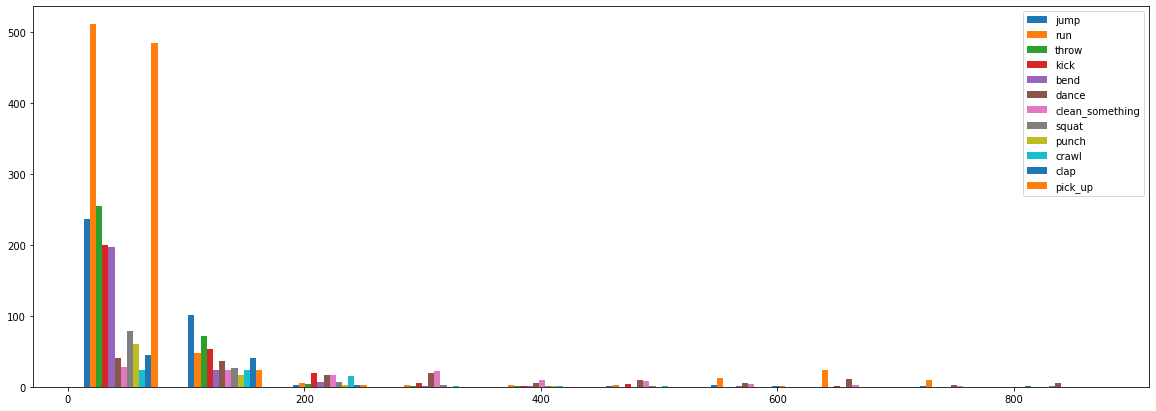

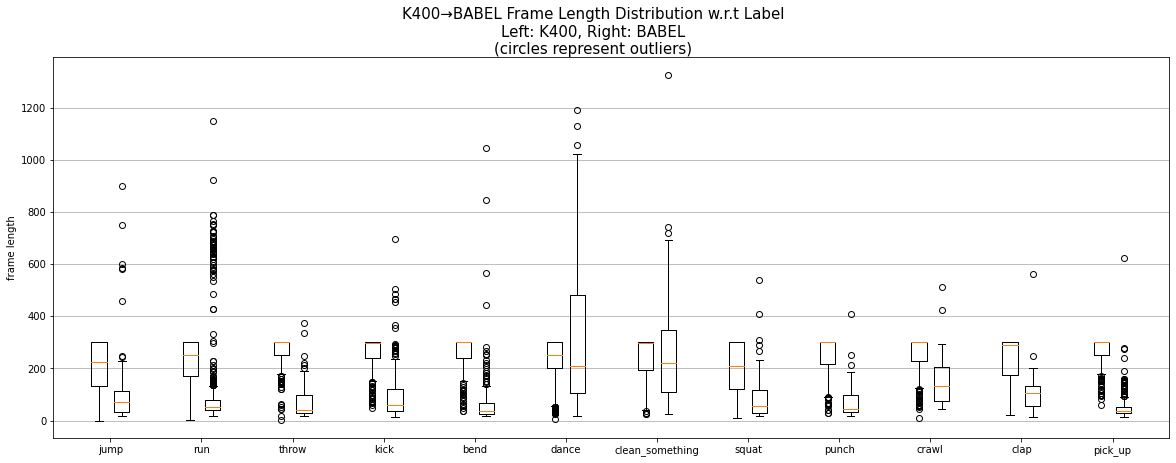

In [53]:
labelnames = ['jump', 'run', 'throw', 'kick', 'bend', 'dance', 'clean_something', 'squat', 'punch', 'crawl', 'clap', 'pick_up']
df = pd.read_csv('data/_filelists/babel/processed/filelist_babel_train_closed.txt', delimiter=' ', header=None, names=['path', 'start', 'length', 'label'])
bins = None

plt.figure(figsize=(20, 7))
hists = []
babel_lengths = []
for label in range(12):
    df_label = df[df['label']==label]
    if bins is None:
        heights, bins = np.histogram(df_label['length'])
    else:
        heights, bins = np.histogram(df_label['length'], bins=bins)
    babel_lengths.append(df_label['length'])
    hists.append(heights)

width = (bins[1] - bins[0])/(12+5)
for i, hist in enumerate(hists):
    plt.bar(bins[:-1]+(i*width), hist, width=width, label=labelnames[i])
plt.legend() 
plt.show()


df_k400 = pd.read_csv('data/_filelists/k400/filelist_k400_train_closed.txt', delimiter=' ', header=None, names=['path', 'length', 'label'])
k400_lengths = []
for label in range(12):
    df_label = df_k400[df_k400['label']==label]
    k400_lengths.append(df_label['length'])

width = 1/6
x = np.arange(1, 13)
plt.figure(figsize=(20, 7))
# plt.bar(np.arange(12), 2*stds, bottom=means-stds)
plt.boxplot(
    k400_lengths + babel_lengths, widths=width,
    positions=np.concatenate([x-width/2-width/4, x+width/2+width/4])
)
# plt.boxplot(babel_lengths, widths=width, positions=)
plt.gca().set_xticks(np.arange(1, 13))
plt.gca().set_xticklabels(labelnames)
plt.grid(axis='y') 
plt.ylabel('frame length')
plt.suptitle('K400→BABEL Frame Length Distribution w.r.t Label\nLeft: K400, Right: BABEL\n(circles represent outliers)', fontsize=15)
plt.show()